# CanTek Project


**Name: Emmanuel Nnadi**

```
Overview:
    - Section 1: Scraping Zolo Real Estate Website
    - Section 2: Basic Analysis
    - Section 3: Analysing with Visualizations
```

Targeted Website: https://www.zolo.ca/

##### Objective
- My goal is to get webscraped data that has at least 1000 houses for analysis.

##### Roadblocks
- Zolo will not give you full listing details unless you have an account with them. I had to use selenium to simulate a sign in. 
- I have issues with my chromedriver so i used firefox instead. 

## Section 1: Scraping Zolo

In [1]:
# pip install selenium


In [2]:
# Importing Dependencies
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time

Create a Firefox driver

In [3]:
from selenium import webdriver

driver = webdriver.Firefox()


Load Zolo home page

In [4]:
# Website test
driver.get('https://www.zolo.ca/toronto-real-estate/page-1')

# find element using xpath, to click on sign in button.
element = driver.find_element(By.XPATH,'//*[@id="drawer-menu"]/div/nav/div[3]/button[2]')

Open Sign in dialog. I need to sign in to get all the data on the page. Zolo website design.

In [5]:
# click button
driver.execute_script("arguments[0].click();", element)

# Wait for login page to load. Code encounters a bug if i dont. 
time.sleep(2)

# Enter the email for login
email = driver.find_element(By.XPATH, '//*[@id="email"]')

# I want to add this email into selenium so i can enter it automatically.
email.send_keys("e_nnadi@ymail.com")

# Click on the email login.
submit_email_btn = driver.find_element(By.XPATH,'//*[@id="submitEmail"]')
submit_email_btn.click()

Wait for pin input to appear and enter the account pin

In [7]:
wait = WebDriverWait(driver, 10)
pin = wait.until(EC.visibility_of_element_located((By.XPATH,'//*[@id="pin"]')))
pin.send_keys("416")
submit_pin_btn = driver.find_element(By.XPATH,'/html/body/main/div/div/section/form/button')
submit_pin_btn.click()

### Collect Zolo listing data

In [8]:
import requests
# using to requests raw data.

In [9]:
# Raw data. Dirty Data on display.
raw_url = 'https://www.zolo.ca/toronto-real-estate/page-1'
dirty_data = requests.get(raw_url)

dirty_data.content



b'<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><link href="/cdn-cgi/styles/challenges.css" rel="stylesheet"></head><body class="no-js"><div class="main-wrapper" role="main"><div class="main-content"><noscript><div id="challenge-error-title"><div class="h2"><span class="icon-wrapper"><div class="heading-icon warning-icon"></div></span><span id="challenge-error-text">Enable JavaScript and cookies to continue</span></div></div></noscript></div></div><script>(function(){window._cf_chl_opt={cvId: \'2\',cZone: "www.zolo.ca",cType: \'managed\',cNounce: \'25945\',cRay: \'81e651374a71a1f0\',cHash: \'128afaf1e729c2e\',cUPMDTk: "\\/toronto-real-estate\\/page-1?__cf_chl_tk=kCB.WznQBXxnV0nDIZOe07bfSeWyJocJmACveZxcrTM-1698696789-0-gaNycGzNCxA",

Build data points for each house listing

In [10]:
data = []

i = 1
while len(data) < 1000:
    driver.get(f'https://www.zolo.ca/toronto-real-estate/page-{i}')
    soup = BeautifulSoup(driver.page_source,'lxml')
    houses = soup.find_all('div', class_='card-listing--details')
    
    for house in houses:
        
        data_point = {
            'Price': None,
            'Bedroom': None,
            'Bathroom': None,
            'Square Ft': None,
            'Brokerage': None
        }
        
        try:
            data_point['Price'] = int(house.find('span', itemprop='price').text.replace(',', ''))
            data_point['Brokerage'] = house.find('div', class_='card-listing--brokerage').text.replace('•', '')
        
            tags = house.find_all('li', class_='xs-inline xs-mr1')
            if len(tags) == 3:
                data_point['Bedroom'] = int(tags[0].text[0])
                data_point['Bathroom'] = int(tags[1].text[0])

                sq_ft_text = tags[2].text

                sq_ft = None
                if '-' in sq_ft_text:
                    sq_ft = int(sq_ft_text.split(' ')[0].split('-')[1]) 
                else:
                    sq_ft = int(sq_ft_text.split(' ')[0])
                    
                data_point['Square Ft'] = sq_ft
            else:
                raise Exception('Invalid Data point, no sqft')
            
            data.append(data_point)
        except Exception as e:
            print(e)
            continue
        
    i += 1
print("Finished scrapping")        

Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
invalid literal for int() with base 10: '5000+'
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
invalid literal for int() with base 10: '–'
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
invalid literal for int() with base 10: '5000+'
Invalid Data point, no sqft
Invalid Data point, 

Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
invalid literal for int() with base 10: '5000+'
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
invalid literal for int() with base 10: '–'
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data point, no sqft
Invalid Data

In [11]:
len(data)

1017

## Section 2 - Basic Analysis

#### Use Pandas for analysis

In [13]:
import pandas as pd
df = pd.DataFrame.from_records(data)
# Data points in Pandas
df

,Price,Bedroom,Bathroom,Square Ft,Brokerage
0,458600,1,1,899,ZOLO REALTY
1,1199000,3,3,1399,ZOLO REALTY
2,1200000,2,2,1399,ZOLO REALTY
3,928000,2,2,799,ZOLO REALTY
4,579000,2,1,1399,ZOLO REALTY
...,...,...,...,...,...
1012,1195000,2,3,1500,BOSLEY REAL ESTATE LTD.
1013,2399000,2,3,1999,FOREST HILL REAL ESTATE INC.
1014,839000,2,1,1199,WAKEFIELD REALTY CORPORATION
1015,449000,1,1,799,REAL ONE REALTY INC.


In [14]:
# Ensure there are no null values. This is to ensure the data is clean and clear for analysis. No null values.
df.isna().sum()

Price        0
Bedroom      0
Bathroom     0
Square Ft    0
Brokerage    0
dtype: int64

#### Import Visualisation 

In [15]:
# import matplot and seaborn for chart visuals.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## House Price Insights

In [16]:
# Average House price
# This shows the average price of the house for the 1000 data sets. 
price_mean = df['Price'].mean()

# Round to two decimal places. 
round_mean = round(price_mean,2)
# Fine tune print result
print('The Average House Price For The Total Data Set Is', '$', round_mean,'CAD')

The Average House Price For The Total Data Set Is $ 1009206.55 CAD


In [18]:
# Test run the unique column types.  
unique_beds = df['Bedroom'].unique()
unique_baths = df['Bathroom'].unique()
unique_brokers = df['Brokerage'].unique()

print('There are', len(unique_brokers), 'Brokerages')
print('There are', len(unique_beds), 'Bed Types')
print('There are', len(unique_baths), 'Bathroom Types')



There are 306 Brokerages
There are 7 Bed Types
There are 6 Bathroom Types


In [19]:
# Average Price For Loop. 
# Create a dict
avg_prices = {}
# For loop for bedrooms
for bed in unique_beds:
    bed_filter = df[df['Bedroom'] == bed]
    avg_price = bed_filter['Price'].mean()
    rnd_price = round(avg_price, 2)
    avg_prices[bed] = rnd_price
    
for bed, avg_price in avg_prices.items():
    print(f"Average price for {bed} bed: ${avg_price} CAD")

Average price for 1 bed: $648767.81 CAD
Average price for 3 bed: $1425641.76 CAD
Average price for 2 bed: $979577.88 CAD
Average price for 4 bed: $2189733.04 CAD
Average price for 5 bed: $2063369.23 CAD
Average price for 6 bed: $2975000.0 CAD
Average price for 7 bed: $1099000.0 CAD


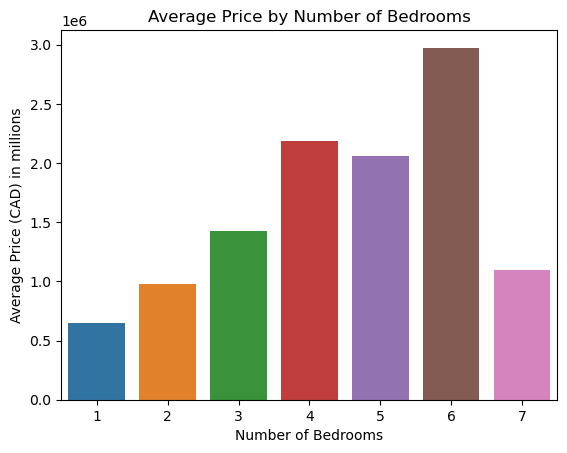

In [20]:
# Average price visual.
df_avg_prices = pd.DataFrame(list(avg_prices.items()), columns=['Bedroom', 'Avg_Price'])

# Plot the chart using Seaborn
sns.barplot(data=df_avg_prices, x='Bedroom', y='Avg_Price')

# Add labels and title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price (CAD) in millions')
plt.title('Average Price by Number of Bedrooms')

# Display the chart
plt.show()


## Square Feet Basic Insights


In [21]:
max_sqft = df['Square Ft'].max()
min_sqft = df['Square Ft'].min()
avg_sqft = df['Square Ft'].mean()
rnd_sqft = round(avg_sqft,2)
print('There is a maximum of', max_sqft, 'sqft')
print('There is a minimum of', min_sqft, 'sqft')
print('There is an average of', rnd_sqft, 'sqft for the whole listing')

There is a maximum of 5000 sqft
There is a minimum of 499 sqft
There is an average of 1210.3 sqft for the whole listing


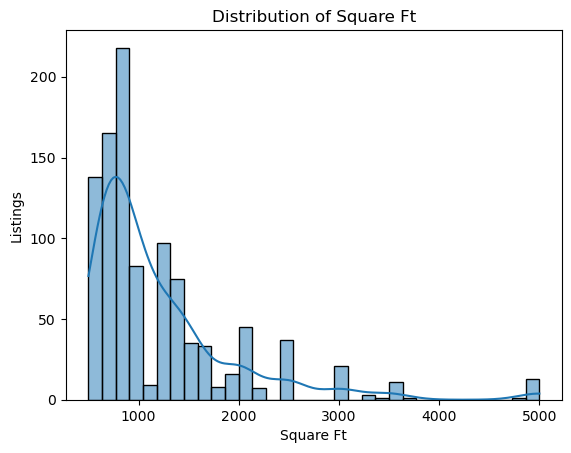

In [23]:
# Skewed right distribution
sns.histplot(data=df, x='Square Ft', kde=True)
plt.xlabel('Square Ft')
plt.ylabel('Listings')
plt.title('Distribution of Square Ft')
plt.show()

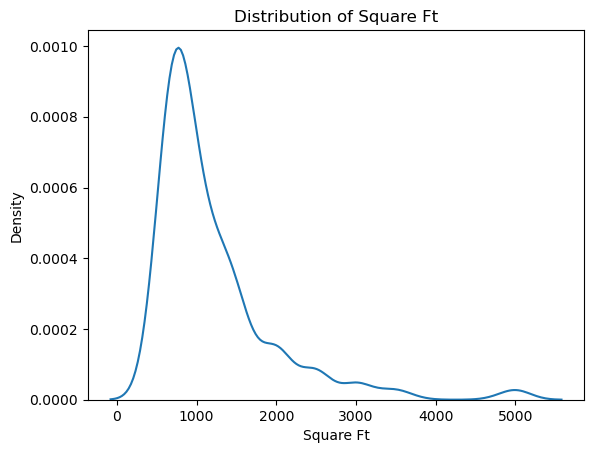

In [24]:
# Kernel Density

sns.kdeplot(data=df, x='Square Ft')
plt.xlabel('Square Ft')
plt.ylabel('Density')
plt.title('Distribution of Square Ft')
plt.show()

There are more listings concentrated close to the 1000 square feet range. This has produced Right Skewed distribution in both graphs. Most Square Ft is clustered to the left side. This suggests listings are more lkely with 1-2 bedroom due to small square foot size.

## Section 3 - Analysis with Visualization

### Price in relation to Square Foot 

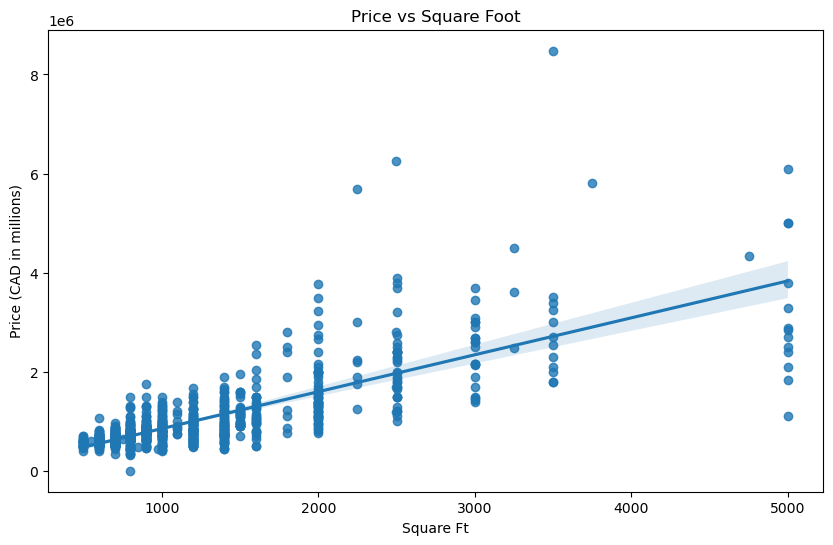

In [25]:
# SEABORN Chart
# As you can see there is a general increase in price as square foot increases. Which makes sense.
# However there are few exception. Most likely due to the area itself. E.g Downtown Toronto vs North York.
plt.figure(figsize=(10, 6))
sns.regplot(x='Square Ft', y='Price', data=df)
plt.title('Price vs Square Foot')
plt.xlabel('Square Ft')
plt.ylabel('Price (CAD in millions)')
plt.show()

Analysis: There is a positive correlation between Price and Square foot.

## Broker Insights

In [26]:
# Brokerage test

broker_counts = df['Brokerage'].value_counts()
print(broker_counts)

# RIGHT AT HOME REALTY has the most listings.

Brokerage
ROYAL LEPAGE SIGNATURE REALTY            55
RIGHT AT HOME REALTY                     37
RE/MAX HALLMARK REALTY LTD.              29
SOTHEBY`S INTERNATIONAL REALTY CANADA    26
RE/MAX REALTRON REALTY INC.              26
                                         ..
HOMELIFE/VISION REALTY INC.               1
THE REAL ESTATE OFFICE INC.               1
POWER 7 REALTY                            1
KHOULANI REAL ESTATE GROUP INC.           1
WAKEFIELD REALTY CORPORATION              1
Name: count, Length: 306, dtype: int64


In [27]:
# Listings by bedroom
beds = df.Bedroom.sort_values().unique()
for bed in beds:
    count = df['Bedroom'].value_counts()[bed]
    print(f'For {bed} Bedroom, there are', count)

For 1 Bedroom, there are 388
For 2 Bedroom, there are 391
For 3 Bedroom, there are 168
For 4 Bedroom, there are 54
For 5 Bedroom, there are 13
For 6 Bedroom, there are 2
For 7 Bedroom, there are 1


2 BEDROOM LISTINGS APPEAR TO BE THE MOST COMMON AND THE MOST IN DEMAND.

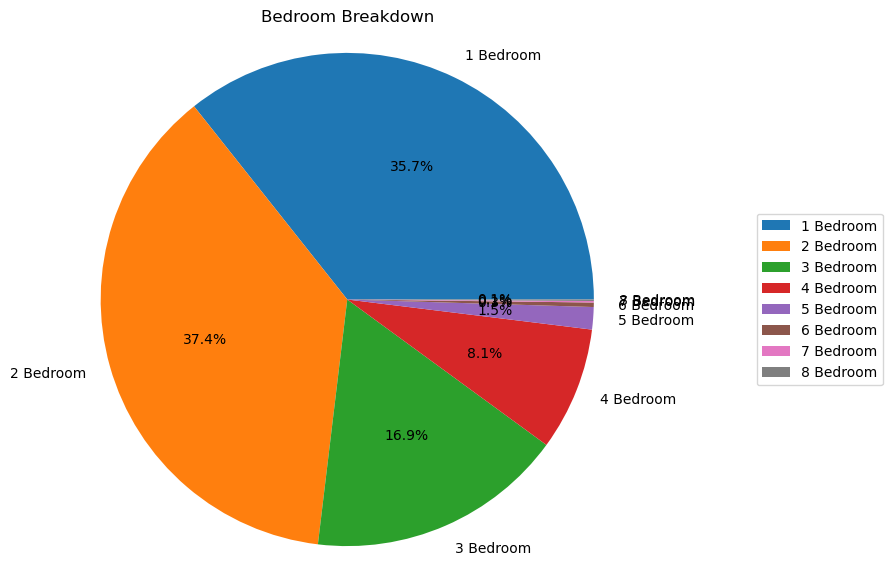

In [28]:
# Visualization by bedroom. Pie Chart Breakdown.

bedroom_labels = ['1 Bedroom', '2 Bedroom', '3 Bedroom', '4 Bedroom', '5 Bedroom', '6 Bedroom', '7 Bedroom', '8 Bedroom']
bedroom_counts = [366, 384, 173, 83, 15, 3, 1, 1]


plt.figure(figsize=(7, 7))
plt.pie(bedroom_counts, labels=bedroom_labels, autopct='%1.1f%%')
plt.title('Bedroom Breakdown')
plt.axis('equal')
plt.legend(labels=bedroom_labels, loc='right', bbox_to_anchor=(1.5, 0.5))
plt.show()

### Top 20 Brokers by Listing Insights

In [29]:
top_brokers = broker_counts.head(20)
top_brokers

Brokerage
ROYAL LEPAGE SIGNATURE REALTY            55
RIGHT AT HOME REALTY                     37
RE/MAX HALLMARK REALTY LTD.              29
SOTHEBY`S INTERNATIONAL REALTY CANADA    26
RE/MAX REALTRON REALTY INC.              26
FOREST HILL REAL ESTATE INC.             20
ROYAL LEPAGE YOUR COMMUNITY REALTY       19
SAGE REAL ESTATE LIMITED                 19
SUTTON GROUP-ADMIRAL REALTY INC.         18
CHESTNUT PARK REAL ESTATE LIMITED        17
BOSLEY REAL ESTATE LTD.                  17
RE/MAX WEST REALTY INC.                  16
ZOLO REALTY                              16
HOMELIFE LANDMARK REALTY INC.            14
EXP REALTY                               13
BAY STREET GROUP INC.                    12
IPRO REALTY LTD.                         12
KELLER WILLIAMS REFERRED URBAN REALTY    12
PROPERTY.CA INC.                         11
RE/MAX PROFESSIONALS INC.                11
Name: count, dtype: int64

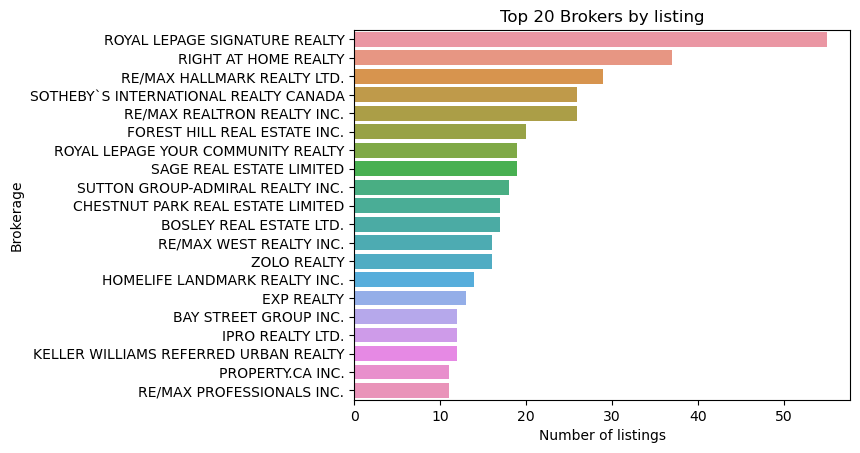

In [30]:
sns.barplot(x=top_brokers.values, y=top_brokers.index)
plt.xlabel('Number of listings')
plt.ylabel('Brokerage')
plt.title('Top 20 Brokers by listing')
plt.show()

### Top 20 Brokers by Valuation ($)

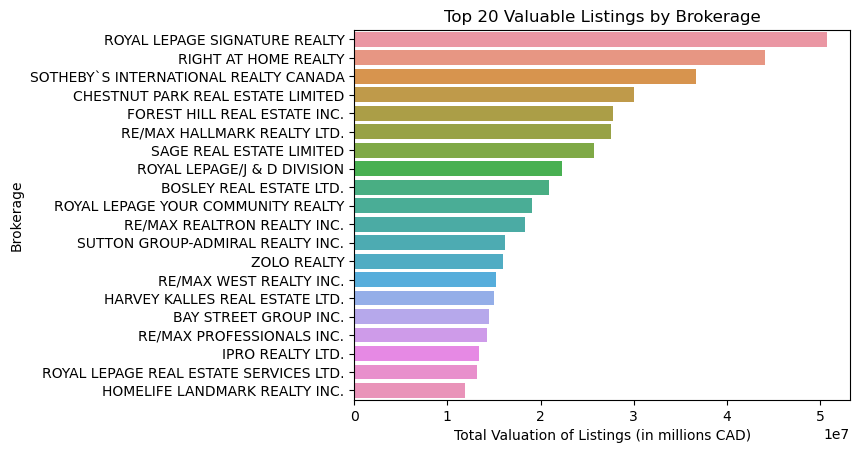

In [31]:
# By Valuation i mean, the total price of all the listings the broker has posted on the website.
total_prices = df.groupby('Brokerage')['Price'].sum()

top_20_value = total_prices.nlargest(20)
sns.barplot(y=top_20_value.index, x=top_20_value.values)
plt.xlabel('Total Valuation of Listings (in millions CAD)')
plt.ylabel('Brokerage')
plt.title('Top 20 Valuable Listings by Brokerage')
plt.show()

In [32]:
# Here you can see the top 20 valued listings.
top_20_value


Brokerage
ROYAL LEPAGE SIGNATURE REALTY             50676498
RIGHT AT HOME REALTY                      44113263
SOTHEBY`S INTERNATIONAL REALTY CANADA     36652588
CHESTNUT PARK REAL ESTATE LIMITED         29984700
FOREST HILL REAL ESTATE INC.              27807780
RE/MAX HALLMARK REALTY LTD.               27571387
SAGE REAL ESTATE LIMITED                  25692498
ROYAL LEPAGE/J & D DIVISION               22258400
BOSLEY REAL ESTATE LTD.                   20956200
ROYAL LEPAGE YOUR COMMUNITY REALTY        19041005
RE/MAX REALTRON REALTY INC.               18360276
SUTTON GROUP-ADMIRAL REALTY INC.          16225799
ZOLO REALTY                               16016199
RE/MAX WEST REALTY INC.                   15212276
HARVEY KALLES REAL ESTATE LTD.            15030899
BAY STREET GROUP INC.                     14500600
RE/MAX PROFESSIONALS INC.                 14287798
IPRO REALTY LTD.                          13352100
ROYAL LEPAGE REAL ESTATE SERVICES LTD.    13181488
HOMELIFE LANDMARK REA

Certain Brokerages like FOREST HILL REAL ESTATE INC. may have fewer listings than RIGHT AT HOME REALTY but still come 
close to listing valuation. This suggests that brokerages like FOREST HILL REAL ESTATE INC., tend to specialize in 
more expensive listings. FOREST HILL REAL ESTATE INC (24 listings, Listing Value;40633560). 

### Top 5 Brokers (Most Listings) with a box plot. Further Analysis.

ROYAL LEPAGE SIGNATURE REALTY: 55
RIGHT AT HOME REALTY: 37
RE/MAX HALLMARK REALTY LTD.: 29
SOTHEBY`S INTERNATIONAL REALTY CANADA: 26
RE/MAX REALTRON REALTY INC.: 26


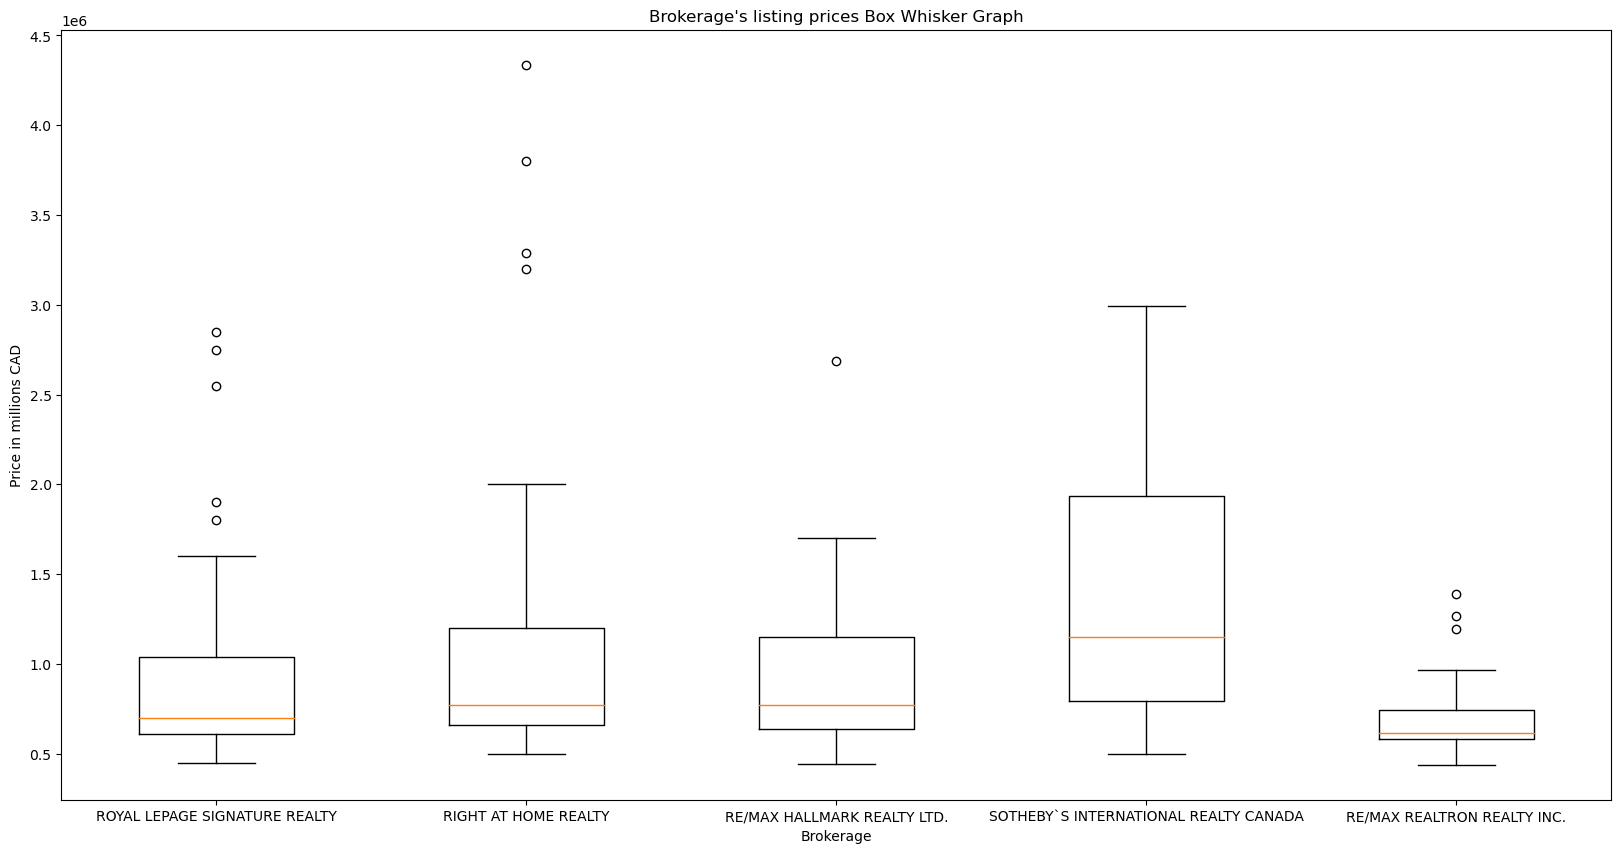

In [33]:
listing_count_for_brokerages: list[int] = df['Brokerage'].value_counts()
brokerages: list[str] = listing_count_for_brokerages.index.tolist()[:5]
for i, broker in enumerate(brokerages):
    print(f"{broker}: {listing_count_for_brokerages[i]}")


prices = []
for broker in brokerages:
    broker_prices = df[df.Brokerage == broker]['Price']
    prices.append(broker_prices)

# outliers for dots
plt.figure(figsize=(20, 10))
plt.boxplot(prices, labels=brokerages)
plt.xlabel('Brokerage')
plt.ylabel('Price in millions CAD')
plt.title("Brokerage's listing prices Box Whisker Graph")
plt.show()

Analysis: 
FOREST HILL REAL ESTATE INC HANDLES MORE EXPENSIVE LISTINGS, BUT NOT MORE LISTINGS THAN RIGHT AT HOME REALTY
RIGHT AT HOME REALTY HAS THE MOST LISTINGS BUT APPEAR TO BE MORE SPECIALIZED IN A SMALLER PRICE RANGES.
THE TOP 4 LISTINGS HAVE THEIR MEDIAN QUITE CLOSE TO EACH OTHER. 

#### Price Distribution for the top 5 

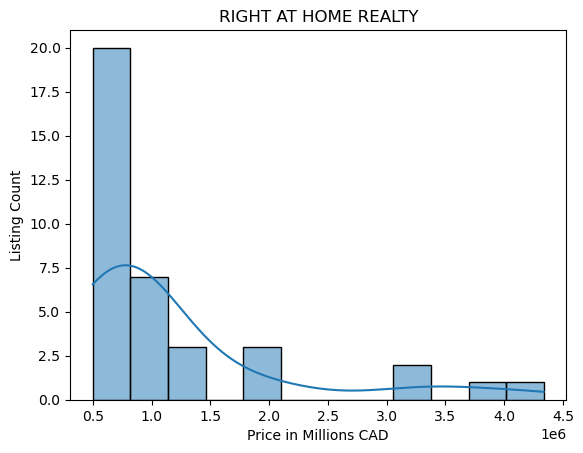

In [34]:
right_filter = df[df['Brokerage'] == 'RIGHT AT HOME REALTY']

# Create a histogram using Seaborn
sns.histplot(data=right_filter, x='Price', kde=True)
plt.xlabel('Price in Millions CAD')
plt.ylabel('Listing Count')
plt.title('RIGHT AT HOME REALTY')
plt.show()

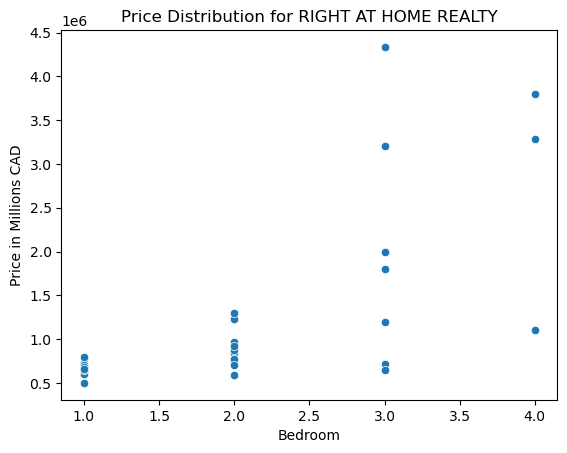

In [35]:

sns.scatterplot(data=right_filter, x='Bedroom', y='Price')
plt.xlabel('Bedroom')
plt.ylabel('Price in Millions CAD')
plt.title('Price Distribution for RIGHT AT HOME REALTY')
plt.show()

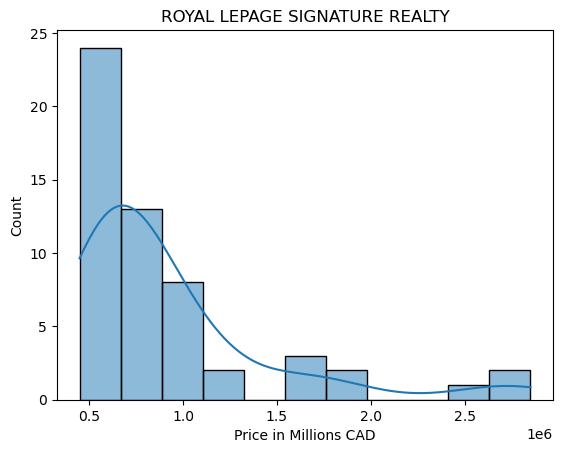

In [36]:
royal_filter = df[df['Brokerage'] == 'ROYAL LEPAGE SIGNATURE REALTY']

# Create a histogram using Seaborn
sns.histplot(data=royal_filter, x='Price', kde=True)
plt.xlabel('Price in Millions CAD')
plt.ylabel('Count')
plt.title('ROYAL LEPAGE SIGNATURE REALTY')
plt.show()

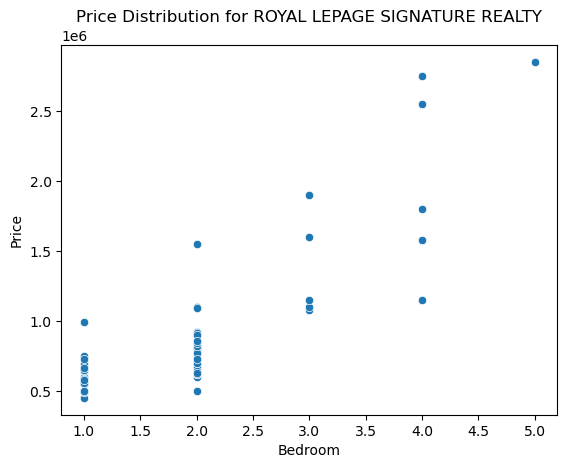

In [37]:
sns.scatterplot(data=royal_filter, x='Bedroom', y='Price')
plt.xlabel('Bedroom')
plt.ylabel('Price')
plt.title('Price Distribution for ROYAL LEPAGE SIGNATURE REALTY')
plt.show()

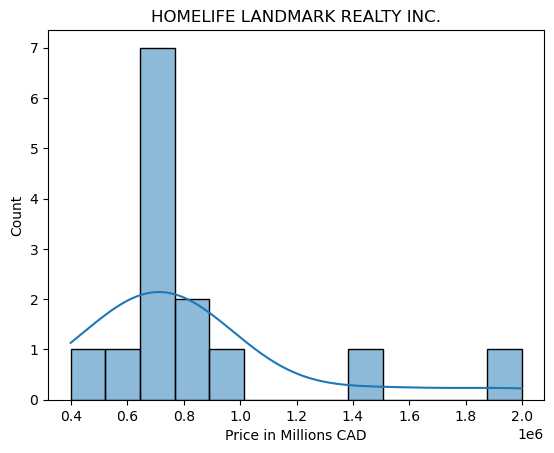

In [38]:
homelife_filter = df[df['Brokerage'] == 'HOMELIFE LANDMARK REALTY INC.']

# Create a histogram using Seaborn
sns.histplot(data=homelife_filter, x='Price', kde=True)
plt.xlabel('Price in Millions CAD')
plt.ylabel('Count')
plt.title('HOMELIFE LANDMARK REALTY INC.')
plt.show()

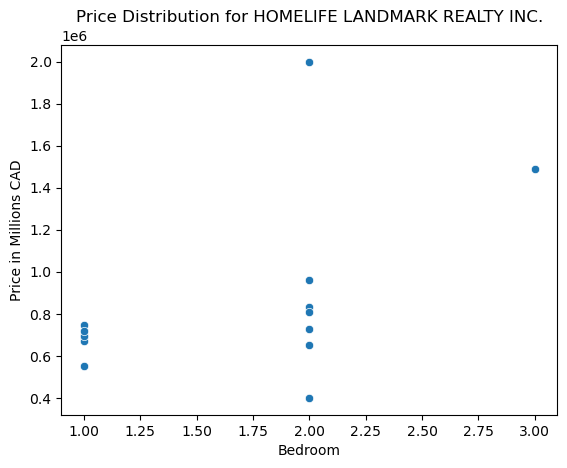

In [39]:
sns.scatterplot(data=homelife_filter, x='Bedroom', y='Price')
plt.xlabel('Bedroom')
plt.ylabel('Price in Millions CAD')
plt.title('Price Distribution for HOMELIFE LANDMARK REALTY INC.')
plt.show()

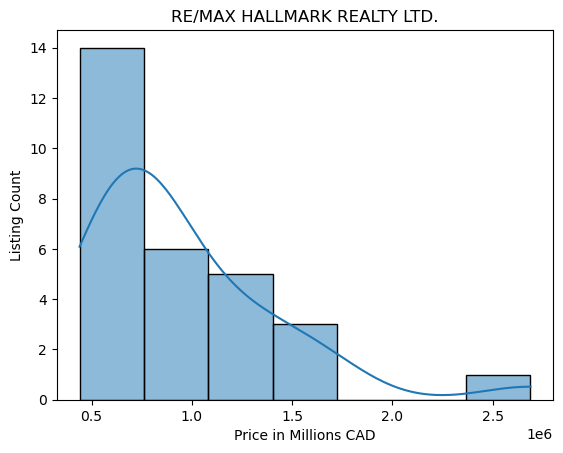

In [40]:
remax_filter = df[df['Brokerage'] == 'RE/MAX HALLMARK REALTY LTD.']

# Create a histogram using Seaborn
sns.histplot(data=remax_filter, x='Price', kde=True)
plt.xlabel('Price in Millions CAD')
plt.ylabel('Listing Count')
plt.title('RE/MAX HALLMARK REALTY LTD.')
plt.show()

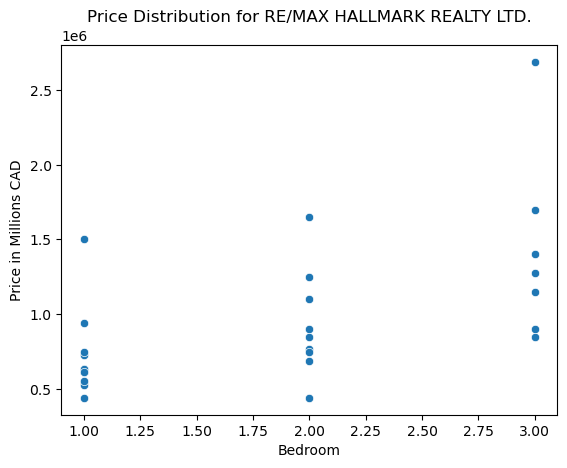

In [41]:
sns.scatterplot(data=remax_filter, x='Bedroom', y='Price')
plt.xlabel('Bedroom')
plt.ylabel('Price in Millions CAD')
plt.title('Price Distribution for RE/MAX HALLMARK REALTY LTD.')
plt.show()

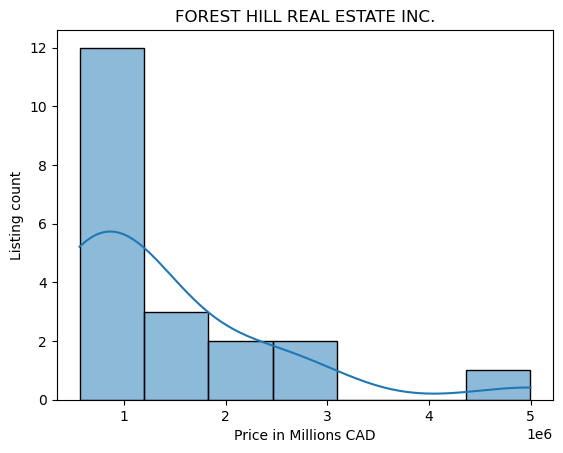

In [42]:
forest_filter = df[df['Brokerage'] == 'FOREST HILL REAL ESTATE INC.']

# Create a histogram using Seaborn
sns.histplot(data=forest_filter, x='Price', kde=True)
plt.xlabel('Price in Millions CAD')
plt.ylabel('Listing count')
plt.title('FOREST HILL REAL ESTATE INC.')
plt.show()

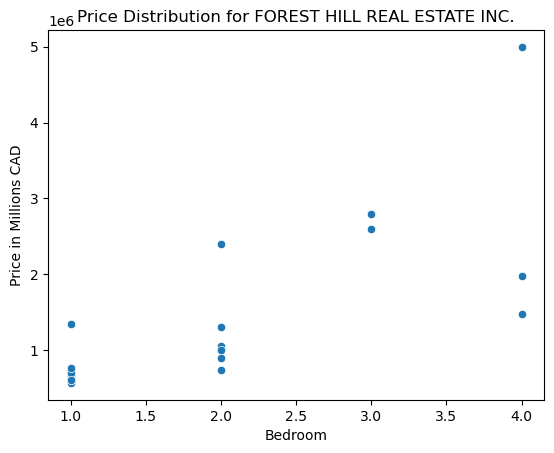

In [43]:
sns.scatterplot(data=forest_filter, x='Bedroom', y='Price')
plt.xlabel('Bedroom')
plt.ylabel('Price in Millions CAD')
plt.title('Price Distribution for FOREST HILL REAL ESTATE INC.')
plt.show()

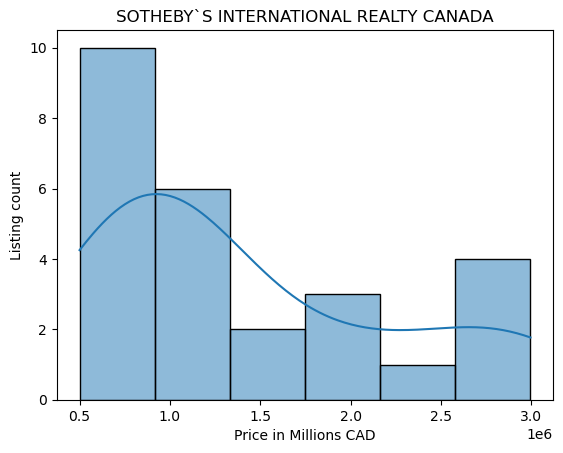

In [44]:
sotheby_filter = df[df['Brokerage'] == 'SOTHEBY`S INTERNATIONAL REALTY CANADA']

# Create a histogram using Seaborn
sns.histplot(data=sotheby_filter, x='Price', kde=True)
plt.xlabel('Price in Millions CAD')
plt.ylabel('Listing count')
plt.title('SOTHEBY`S INTERNATIONAL REALTY CANADA')
plt.show()

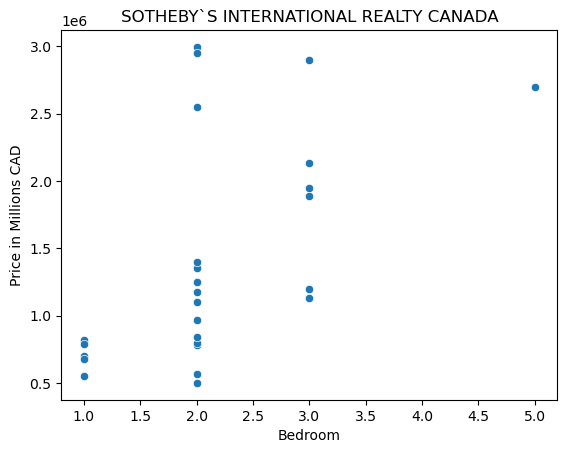

In [45]:
sns.scatterplot(data=sotheby_filter, x='Bedroom', y='Price')
plt.xlabel('Bedroom')
plt.ylabel('Price in Millions CAD')
plt.title('SOTHEBY`S INTERNATIONAL REALTY CANADA')
plt.show()

## House Features Insights

ANALYSIS: 
GIVEN THE AFFORDABILITY OF THE 1 AND 2 BEDROOM IT MAKES SENSE AS TO WHY THERE ARE MORE LISTINGS ON IT. 

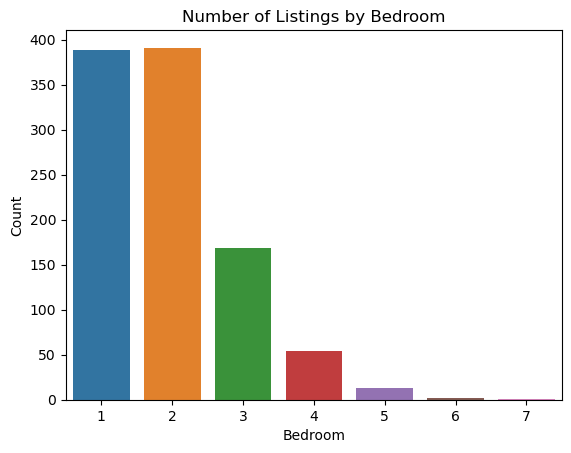

In [46]:
# Count the number of occurrences for each bedroom category
bedroom_counts = df['Bedroom'].value_counts().sort_index()

# Plot the counts using Seaborn barplot
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values)
plt.xlabel('Bedroom')
plt.ylabel('Count')
plt.title('Number of Listings by Bedroom')
plt.show()

### Price Distribution Histogram

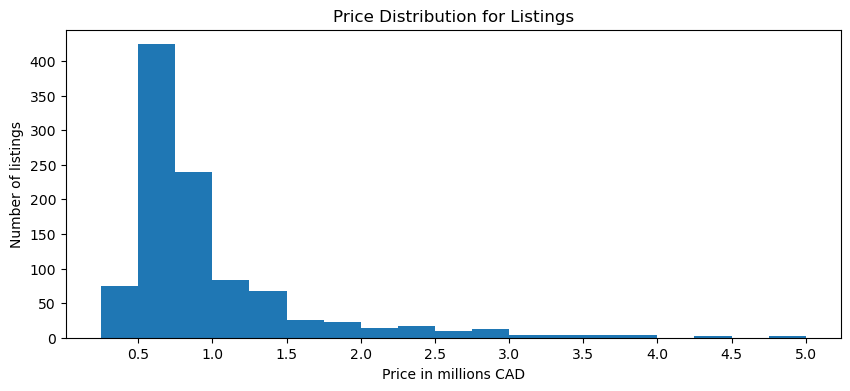

In [47]:
bins = [x / 10**3  for x in range(250, 5250, 250)]

plt.figure(figsize=(10,4))
plt.hist(df.Price / 10**6, bins=bins)

plt.xticks(bins[1::2])
plt.xlabel("Price in millions CAD")
plt.ylabel("Number of listings")
plt.title("Price Distribution for Listings")
plt.show()